In [2]:
from keras.datasets.cifar10 import load_data
(x_train, y_train),(x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
labels = ["飛機", "汽車", "鳥", "貓", "鹿",
          "狗", "青蛙", "馬", "船", "卡車"]

鳥


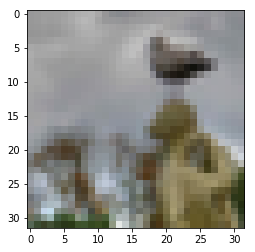

In [21]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
print(labels[y_train[c][0]])
plt.imshow(x_train[c])

In [23]:
x_train_shape = x_train / 255
x_test_shape = x_test / 255
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#DEMO
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense
from keras.layers import Flatten
cnn = Sequential()
# 9(格子) * 3(RGB) * 32(filters) + 32(bias)
cnn.add(Conv2D(32, (3, 3),
               activation="relu",
               padding="same",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# 9 * 32(上一層特徵) * 64 + 64
cnn.add(Conv2D(64, (3, 3),
               activation="relu",
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# 9 * 32(上一層特徵) * 64 + 64
cnn.add(Conv2D(128, (3, 3),
               activation="relu",
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# MLP(大腦)
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

In [33]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
cnn.fit(x_train_shape, y_train_cat, batch_size=200, epochs=10, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 72s 2ms/step - loss: 1.6066 - acc: 0.4225 - val_loss: 1.2981 - val_acc: 0.5276
Epoch 2/10
45000/45000 [==============================] - 70s 2ms/step - loss: 1.1896 - acc: 0.5788 - val_loss: 1.0692 - val_acc: 0.6220
Epoch 3/10
45000/45000 [==============================] - 65s 1ms/step - loss: 1.0047 - acc: 0.6477 - val_loss: 0.9704 - val_acc: 0.6614
Epoch 4/10
45000/45000 [==============================] - 67s 1ms/step - loss: 0.8906 - acc: 0.6908 - val_loss: 0.8658 - val_acc: 0.7062
Epoch 5/10
45000/45000 [==============================] - 68s 2ms/step - loss: 0.7937 - acc: 0.7244 - val_loss: 0.8176 - val_acc: 0.7188
Epoch 6/10
45000/45000 [==============================] - 63s 1ms/step - loss: 0.7249 - acc: 0.7487 - val_loss: 0.7995 - val_acc: 0.7260
Epoch 7/10
45000/45000 [==============================] - 64s 1ms/step - loss: 0.6544 - acc: 0.7734 - val_loss: 0.8120 - val_acc:

In [35]:
cnn.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 6s 564us/step


[0.7980641582489013, 0.737]

In [36]:
cnn.save("simplecnn.h5")

In [37]:
from keras.models import load_model
old = load_model("simplecnn.h5")
old.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 6s 564us/step


[0.7980641582489013, 0.737]

In [38]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, cnn.predict_classes(x_test_shape)))

,0,1,2,3,4,5,6,7,8,9
0,782,15,38,15,9,20,6,15,49,51
1,19,822,8,5,3,5,6,5,17,110
2,64,7,652,46,56,82,37,35,9,12
3,29,9,60,516,66,202,39,41,18,20
4,21,5,83,60,645,53,25,93,9,6
5,10,4,42,131,31,705,15,43,6,13
6,7,7,56,65,37,29,769,11,7,12
7,12,10,25,28,29,61,4,818,3,10
8,66,33,13,14,5,9,4,3,815,38
9,22,59,11,11,3,6,5,16,21,846


In [39]:
labels

['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']